In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2" # Windows環境下でのKMeansのWarning対策

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
'''
    1. データの準備
'''
M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

x1 = np.random.randn(n, M) + np.array([0, 10])
x2 = np.random.randn(n, M) + np.array([5, 5])
x3 = np.random.randn(n, M) + np.array([10, 0])
t1 = np.array([[1, 0, 0] for i in range(n)])
t2 = np.array([[0, 1, 0] for i in range(n)])
t3 = np.array([[0, 0, 1] for i in range(n)])

x = np.concatenate((x1, x2, x3), axis=0)
t = np.concatenate((t1, t2, t3), axis=0)

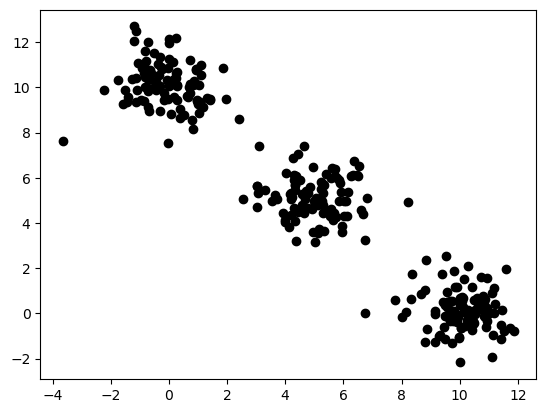

In [4]:
'''
    2. データの可視化
'''
plt.figure()
plt.scatter(x[:,0],x[:,1],color="black")
plt.show()

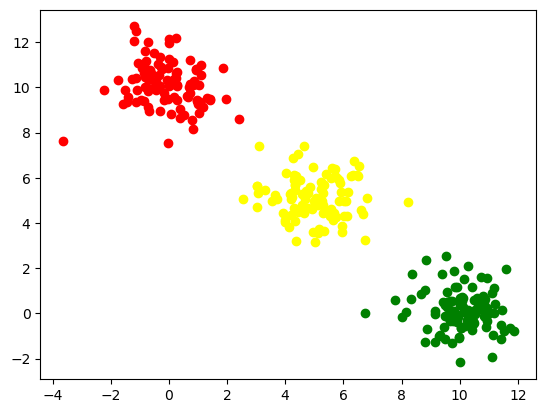

In [5]:
'''
    2. データの可視化
'''
plt.figure()
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="yellow")
plt.scatter(x3[:,0],x3[:,1],color="green")
plt.show()

In [6]:
'''
    3. データの結合と書式変換
'''
data = []
for xx in x:
    data.append({"x":xx[0],"y":xx[1]})
data = pd.DataFrame(data)
data

,x,y
0,0.172959,9.555345
1,1.019514,10.094933
2,-1.115644,10.414441
3,-0.844903,9.413258
4,0.007199,11.956333
...,...,...
295,10.181740,-0.578517
296,10.512582,-0.010274
297,10.364530,0.007366
298,10.162952,0.072832


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

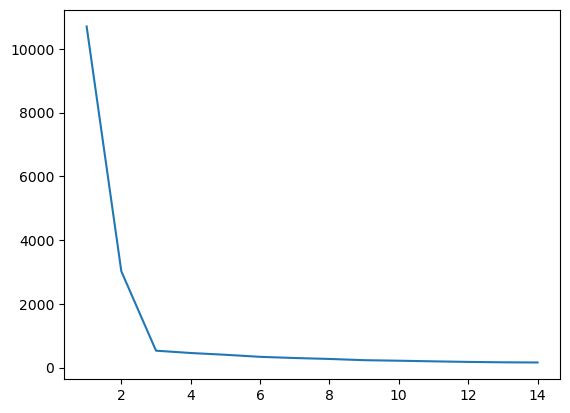

In [8]:
'''
    4. k-means法とエルボー法を用いた最適なクラスター数判定
'''

max_cluster = 15
SSE = []
for i in range(1,max_cluster):
    #インスタンス
    kmeans = KMeans(n_clusters=i,random_state=123, n_init=10)  #kmeans = KMeans(n_clusters=i,random_state=123) 
    #演算
    kmeans.fit(data)
    #wcss値に変換＆リスト格納
    SSE.append(kmeans.inertia_)
    
#可視化
plt.plot(range(1,max_cluster), SSE)
plt.show()


In [9]:
'''
    5. k-means法によるクラスター分類
'''
sc=StandardScaler()
clustering = sc.fit_transform(data)
kmeans = KMeans(n_clusters=4,random_state=123, n_init=10)
clusters = kmeans.fit(clustering)
data["cluster"]=clusters.labels_
data

,x,y,cluster
0,0.172959,9.555345,1
1,1.019514,10.094933,1
2,-1.115644,10.414441,3
3,-0.844903,9.413258,3
4,0.007199,11.956333,3
...,...,...,...
295,10.181740,-0.578517,0
296,10.512582,-0.010274,0
297,10.364530,0.007366,0
298,10.162952,0.072832,0


In [10]:
'''
    6. 分類した結果の可視化
'''
colorMap = {
    0:"yellow",
    1:"green",
    2:"red",
    3:"purple"
}
data["color"] = data.cluster.map(colorMap)
data

,x,y,cluster,color
0,0.172959,9.555345,1,green
1,1.019514,10.094933,1,green
2,-1.115644,10.414441,3,purple
3,-0.844903,9.413258,3,purple
4,0.007199,11.956333,3,purple
...,...,...,...,...
295,10.181740,-0.578517,0,yellow
296,10.512582,-0.010274,0,yellow
297,10.364530,0.007366,0,yellow
298,10.162952,0.072832,0,yellow


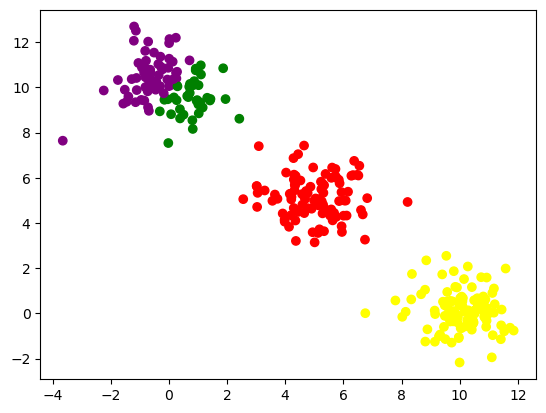

In [11]:
plt.figure()
plt.scatter(data.x,data.y,color=data.color)
plt.show()